# PYTHON CODES FOR FULL DATA ANALYSIS IN MACHINE LEARNING

## Loading Packages 

In [22]:
import numpy as np
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import datasets

## Loading DataSet

In [27]:
iris = datasets.load_iris()
data1 = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


## Split-out validation dataset

In [26]:

array = data1.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)


## Spot Check Algorithms

In [8]:

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))


## Evaluate each model in turn

In [9]:

results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.960897 (0.052113)
LDA: 0.973974 (0.040110)
KNN: 0.957191 (0.043263)
CART: 0.948100 (0.059077)
NB: 0.948858 (0.056322)
SVM: 0.983974 (0.032083)


## Compare Algorithms

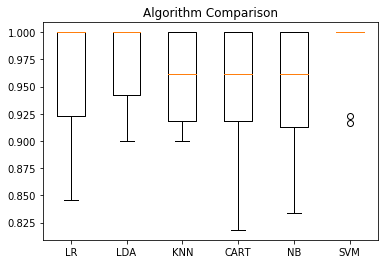

In [10]:

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()





## Split-out validation dataset

In [11]:

array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)


## Make predictions on validation dataset

In [12]:

model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)


## Evaluate predictions

In [13]:

print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

      micro avg       0.97      0.97      0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

